<div style="font-size: 40px; font-weight: bold; color: yellow; text-transform: uppercase; background-color: black; border: 5px solid yellow; padding: 5px 10px; display: inline-block; border-radius: 10px; width:370px">
    Import Libraries   
</div>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Set plot style and color palette
sns.set(style="whitegrid")


<div style="font-size: 32px; font-weight: bold; color: yellow; text-transform: uppercase; background-color: black; border: 5px solid yellow; padding: 5px 10px; display: inline-block; border-radius: 10px; width:400px">
    Load and Inspect Data   
</div>

In [2]:
# Load the dataset
file_path = '/kaggle/input/ai-generated-art-trends/ai_generated_art_trends_2024.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Artwork_ID,Artist_Name,Art_Style,Creation_Date,Medium,Tools_Used,Popularity_Score,Region,Art_Genre,Platform,Description,Image_URL
0,ART-00001,DALL-E,Conceptual,2023-03-11,Collage,GANPaint,1604.25,South America,Urban,Instagram,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00001.jpg
1,ART-00002,AbstractoBot,Futurism,2022-11-27,Oil Paint,MidJourney,4162.12,North America,Abstract,Dribbble,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00002.jpg
2,ART-00003,Vincent,Futurism,2024-03-13,Charcoal,GANPaint,2989.38,Europe,Mythology,Reddit,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00003.jpg
3,ART-00004,ArtBreeder,Impressionism,2022-09-12,Pencil Sketch,ArtBreeder,2985.97,Europe,Still Life,Tumblr,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00004.jpg
4,ART-00005,DALL-E,Surrealism,2022-12-05,Collage,DeepDream,2035.18,Asia,Conceptual,DeviantArt,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00005.jpg


In [3]:
# Summary of the dataset
df.info()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artwork_ID        10000 non-null  object 
 1   Artist_Name       10000 non-null  object 
 2   Art_Style         10000 non-null  object 
 3   Creation_Date     10000 non-null  object 
 4   Medium            10000 non-null  object 
 5   Tools_Used        10000 non-null  object 
 6   Popularity_Score  10000 non-null  float64
 7   Region            10000 non-null  object 
 8   Art_Genre         10000 non-null  object 
 9   Platform          10000 non-null  object 
 10  Description       10000 non-null  object 
 11  Image_URL         10000 non-null  object 
dtypes: float64(1), object(11)
memory usage: 937.6+ KB


,Artwork_ID,Artist_Name,Art_Style,Creation_Date,Medium,Tools_Used,Popularity_Score,Region,Art_Genre,Platform,Description,Image_URL
count,10000,10000,10000,10000,10000,10000,10000.000000,10000,10000,10000,10000,10000
unique,10000,15,10,730,10,5,NaN,6,10,10,1,10000
top,ART-00001,MidJourney,Cubism,2023-05-02,Pencil Sketch,DeepDream,NaN,South America,Portrait,Dribbble,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00001.jpg
freq,1,694,1050,28,1048,2032,NaN,1728,1049,1086,10000,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,2508.190738,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1430.922879,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,50.850000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1267.712500,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2492.025000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3763.245000,NaN,NaN,NaN,NaN,NaN


In [4]:
# Display column names
df.columns


Index(['Artwork_ID', 'Artist_Name', 'Art_Style', 'Creation_Date', 'Medium',
       'Tools_Used', 'Popularity_Score', 'Region', 'Art_Genre', 'Platform',
       'Description', 'Image_URL'],
      dtype='object')

<div style="font-size: 30px; font-weight: bold; color: yellow; text-transform: uppercase; background-color: black; border: 5px solid yellow; padding: 5px 10px; display: inline-block; border-radius: 10px; width:600px">
    Data Cleaning and Preprocessing  
</div>

In [5]:
# Check for missing values
print(df.isnull().sum())

# Impute missing values and update DataFrame directly
df['Popularity_Score'] = df['Popularity_Score'].fillna(df['Popularity_Score'].median())
df['Description'] = df['Description'].fillna('No Description')
df['Creation_Date'] = pd.to_datetime(df['Creation_Date'], errors='coerce')
df['Creation_Date'] = df['Creation_Date'].fillna(pd.Timestamp(datetime.now()))


Artwork_ID          0
Artist_Name         0
Art_Style           0
Creation_Date       0
Medium              0
Tools_Used          0
Popularity_Score    0
Region              0
Art_Genre           0
Platform            0
Description         0
Image_URL           0
dtype: int64


In [6]:
# Convert categorical variables to category type
df['Art_Style'] = df['Art_Style'].astype('category')
df['Medium'] = df['Medium'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Platform'] = df['Platform'].astype('category')
df['Art_Genre'] = df['Art_Genre'].astype('category')

# Verify data types
df.dtypes


Artwork_ID                  object
Artist_Name                 object
Art_Style                 category
Creation_Date       datetime64[ns]
Medium                    category
Tools_Used                  object
Popularity_Score           float64
Region                    category
Art_Genre                 category
Platform                  category
Description                 object
Image_URL                   object
dtype: object

In [7]:
# Extract year and month from Creation_Date
df['Year'] = df['Creation_Date'].dt.year
df['Month'] = df['Creation_Date'].dt.month

# Verify new features
df[['Year', 'Month']].head()


,Year,Month
0,2023,3
1,2022,11
2,2024,3
3,2022,9
4,2022,12


<div style="font-size: 32px; font-weight: bold; color: yellow; text-transform: uppercase; background-color: black; border: 5px solid yellow; padding: 5px 10px; display: inline-block; border-radius: 10px; width:600px">
    Exploratory Data Analysis (EDA)   
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


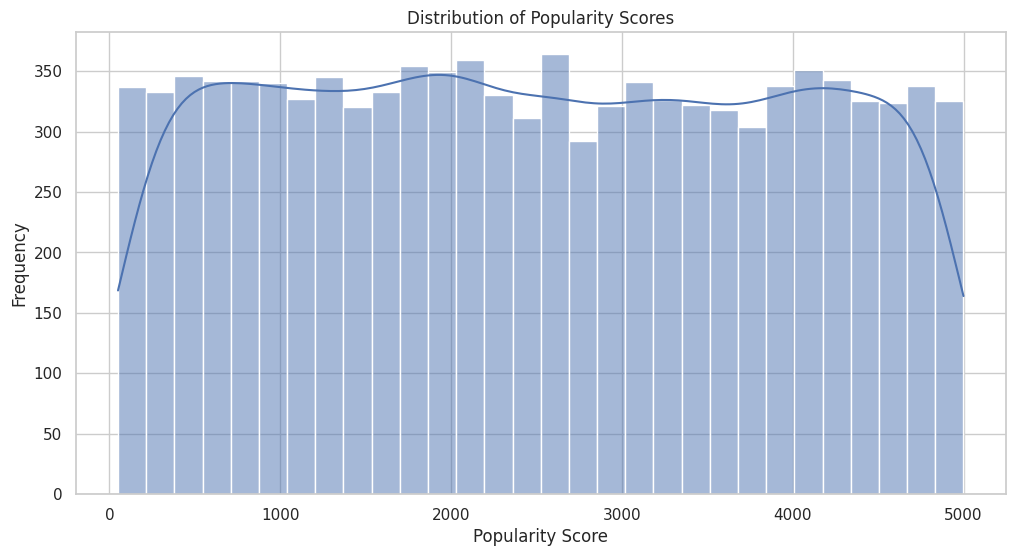

In [8]:
# Histogram of Popularity Scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Popularity_Score'], bins=30, kde=True)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


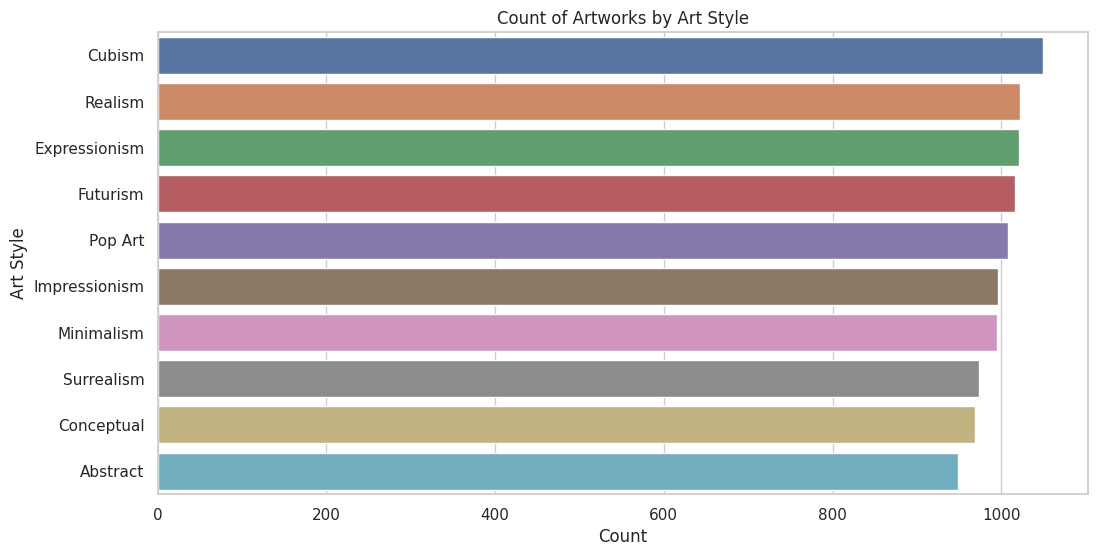

In [9]:
# Count of artworks by Art Style
plt.figure(figsize=(12, 6))
sns.countplot(y='Art_Style', data=df, order=df['Art_Style'].value_counts().index)
plt.title('Count of Artworks by Art Style')
plt.xlabel('Count')
plt.ylabel('Art Style')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


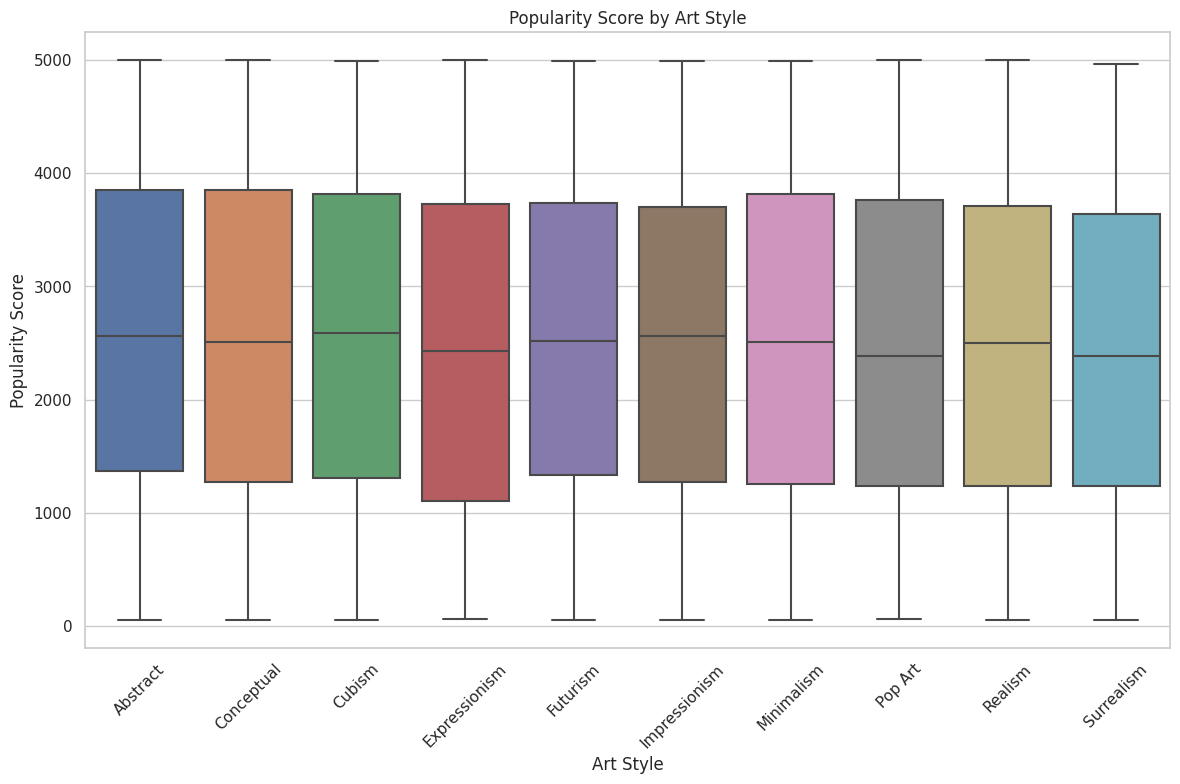

In [10]:
# Boxplot of Popularity Score by Art Style
plt.figure(figsize=(14, 8))
sns.boxplot(x='Art_Style', y='Popularity_Score', data=df)
plt.title('Popularity Score by Art Style')
plt.xlabel('Art Style')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.show()


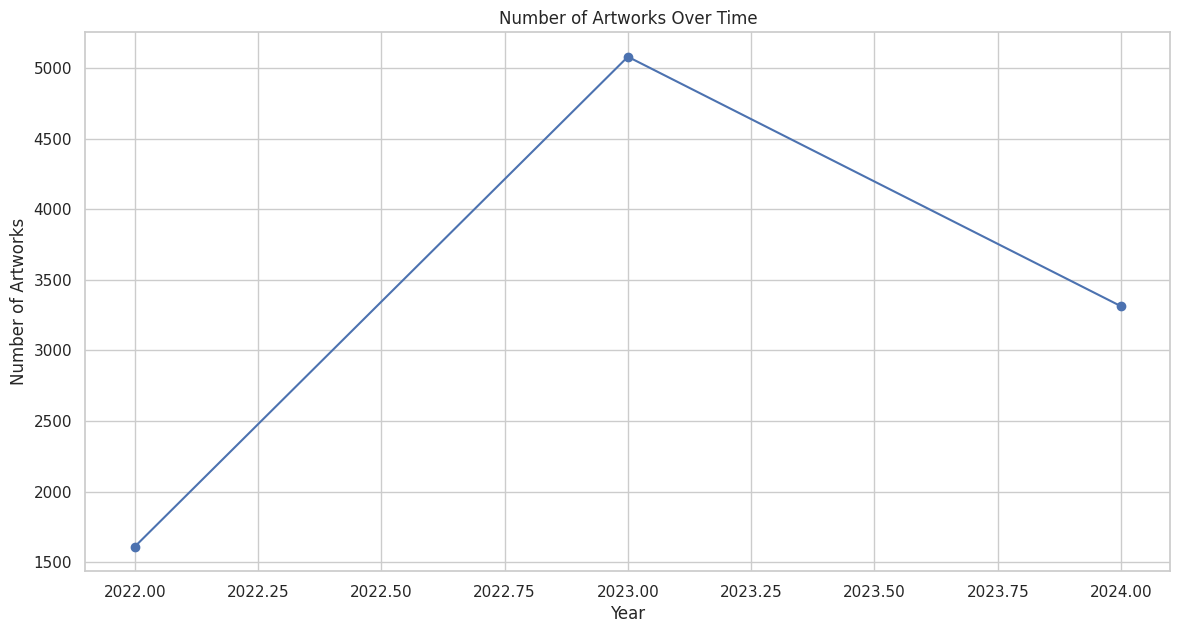

In [11]:
# Plot number of artworks over time
df['Year'] = df['Creation_Date'].dt.year
yearly_artworks = df.groupby('Year').size()

plt.figure(figsize=(14, 7))
yearly_artworks.plot(kind='line', marker='o')
plt.title('Number of Artworks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.grid(True)
plt.show()


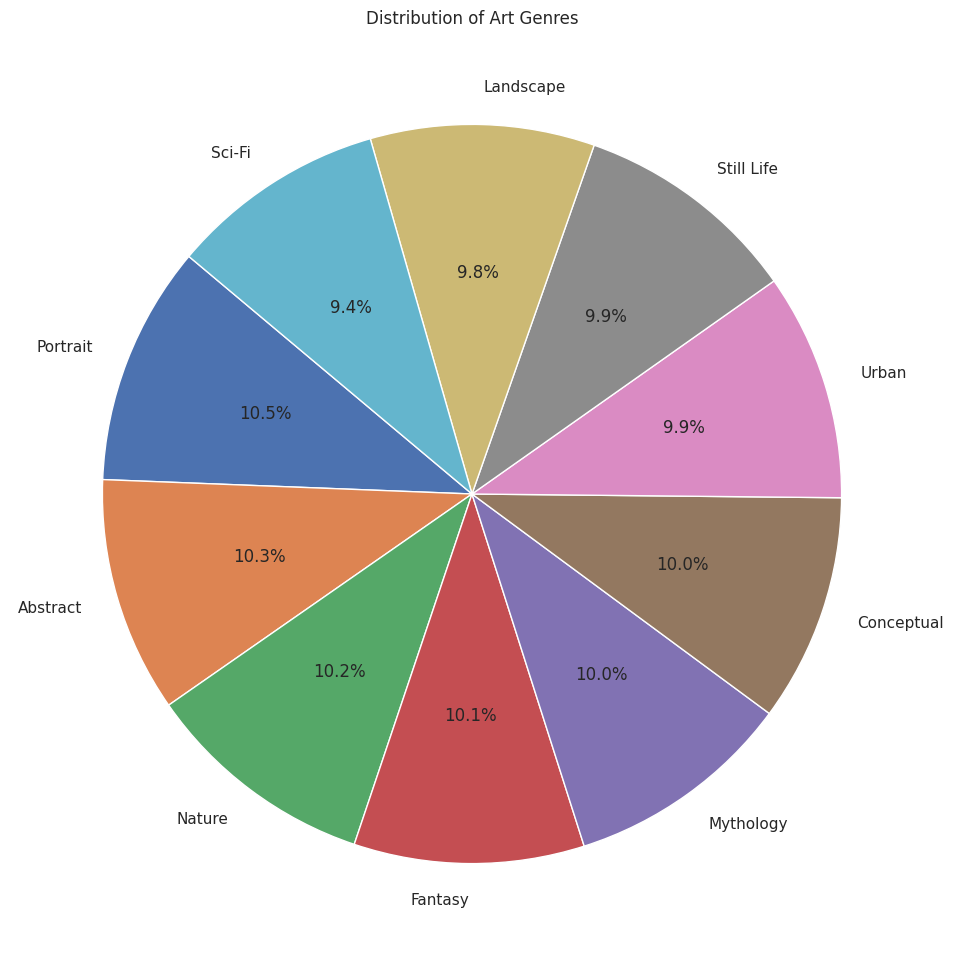

In [12]:
# Pie chart of Art Genre distribution
plt.figure(figsize=(12, 12))
df['Art_Genre'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Art Genres')
plt.ylabel('')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


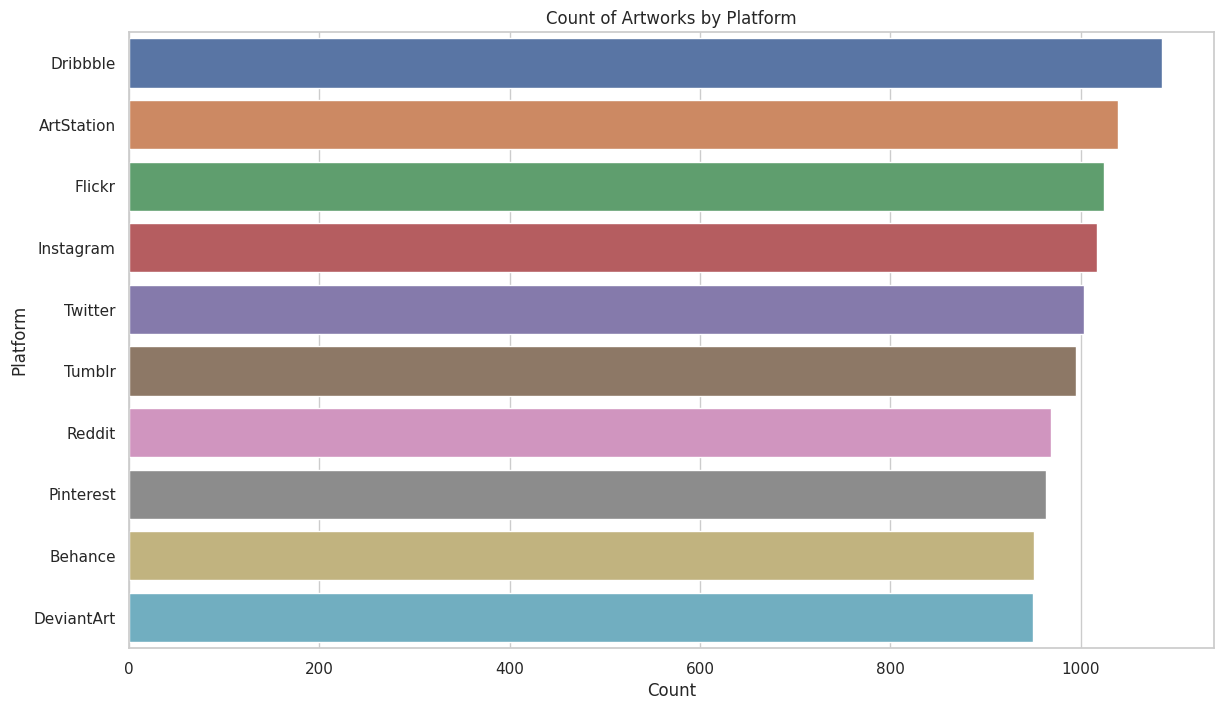

In [13]:
# Bar plot of the most popular platforms
plt.figure(figsize=(14, 8))
sns.countplot(y='Platform', data=df, order=df['Platform'].value_counts().index)
plt.title('Count of Artworks by Platform')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


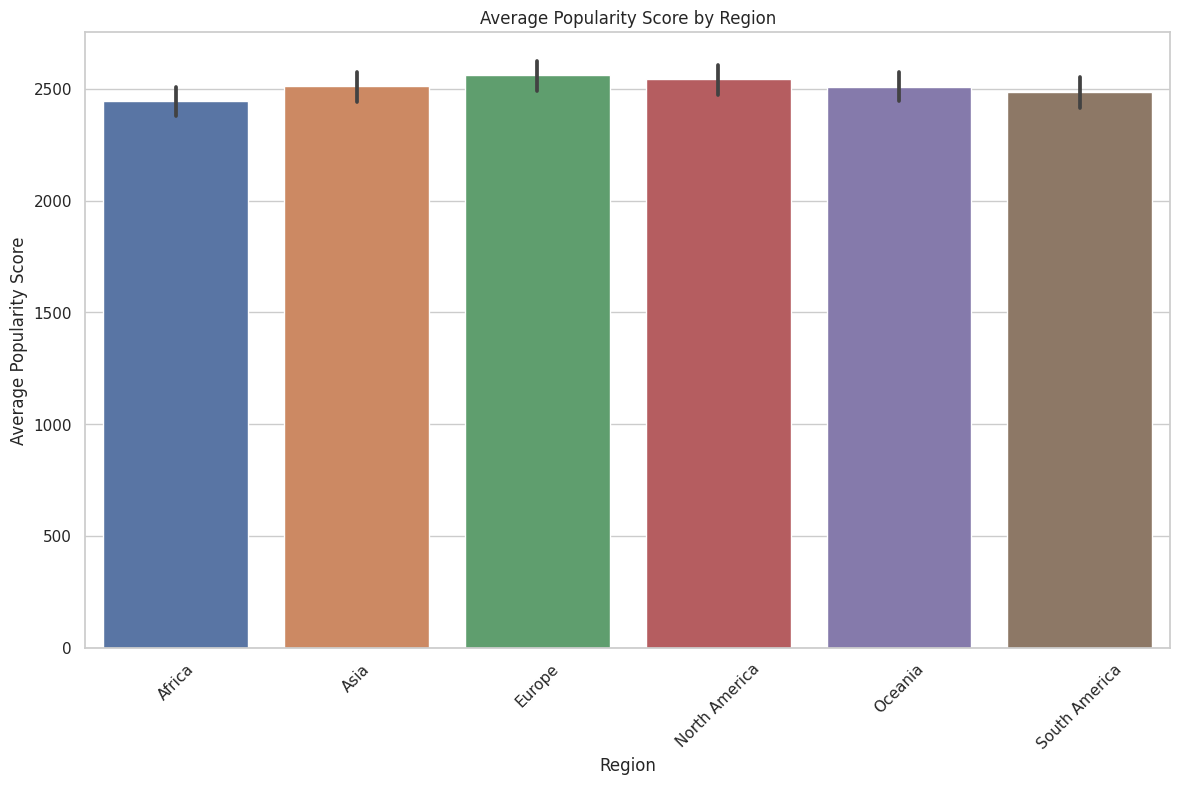

In [14]:
# Bar plot of average Popularity Score by Region
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Popularity_Score', data=df, estimator=np.mean)
plt.title('Average Popularity Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45)
plt.show()


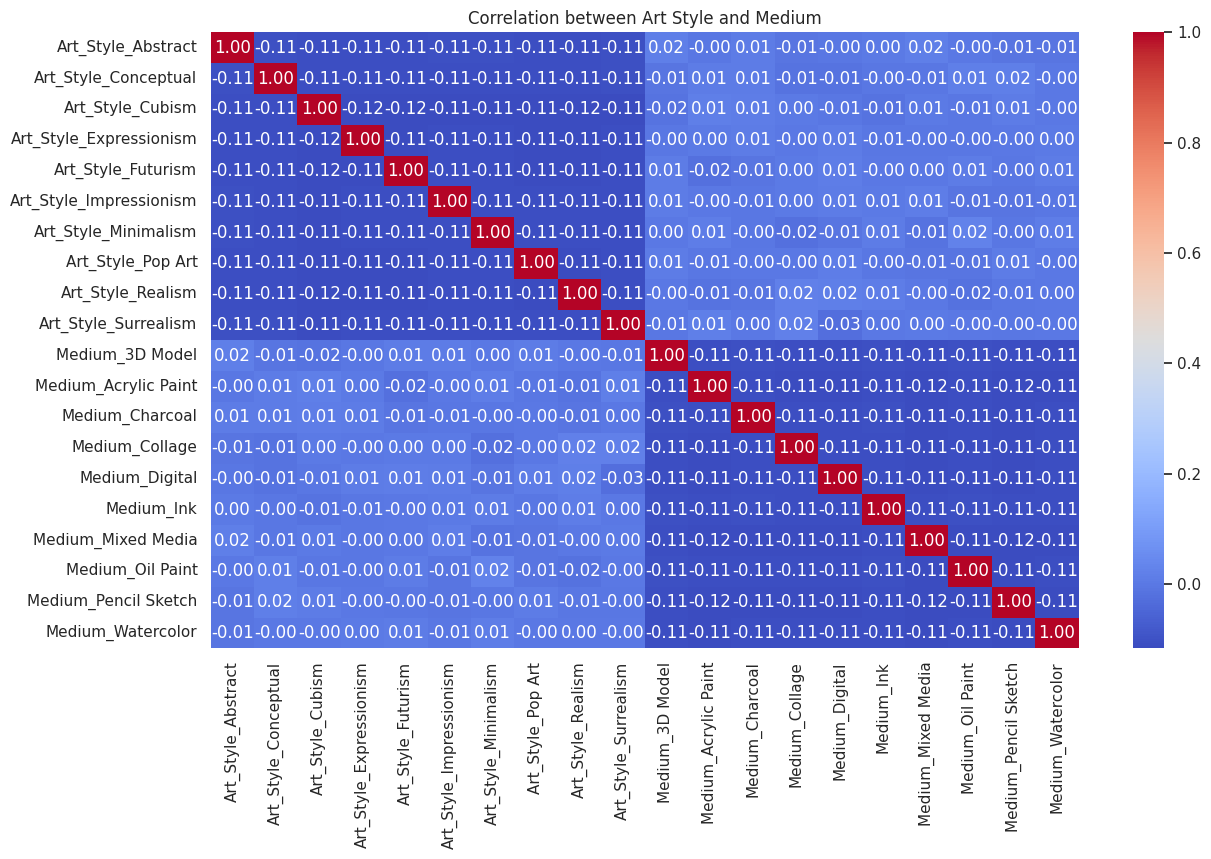

In [15]:
# Compute correlation between Art Style and Medium (categorical encoding required)
df_encoded = pd.get_dummies(df[['Art_Style', 'Medium']])
correlation = df_encoded.corr()

# Heatmap of correlations
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Art Style and Medium')
plt.show()


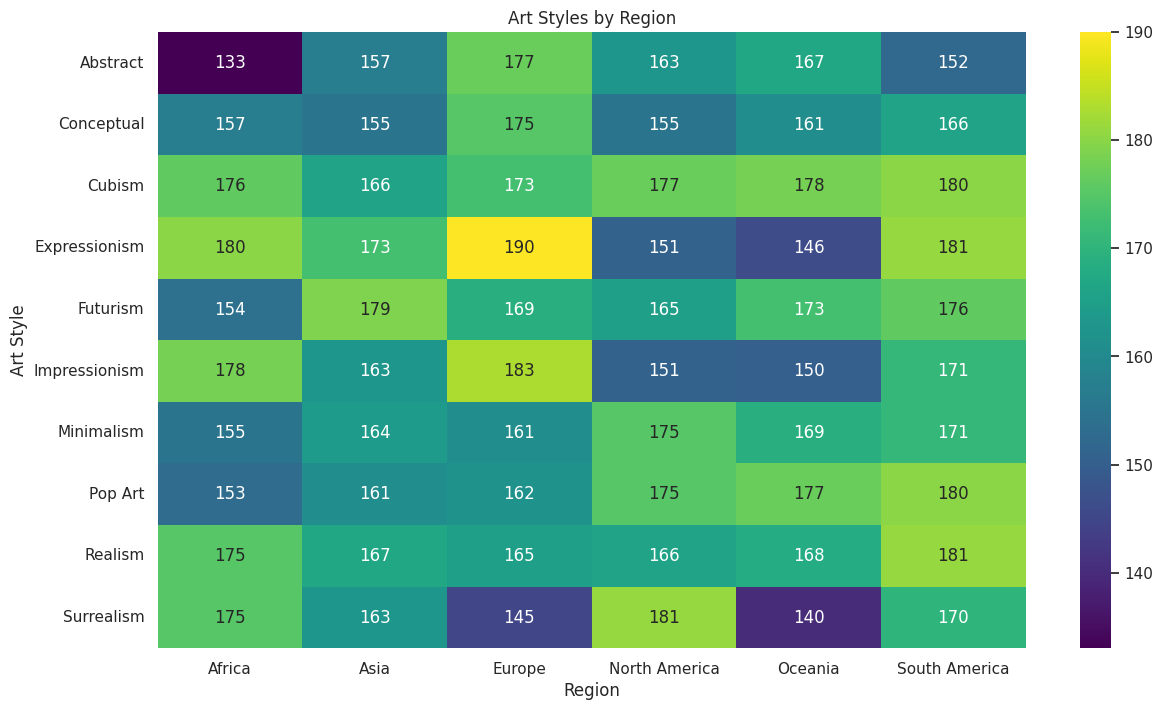

In [16]:
# Heatmap of Art Styles by Region
art_styles_region = pd.crosstab(df['Art_Style'], df['Region'])
plt.figure(figsize=(14, 8))
sns.heatmap(art_styles_region, annot=True, cmap='viridis', fmt='d')
plt.title('Art Styles by Region')
plt.xlabel('Region')
plt.ylabel('Art Style')
plt.show()


<div style="font-size: 35px; font-weight: bold; color: yellow; text-transform: uppercase; background-color: black; border: 5px solid yellow; padding: 5px 10px; display: inline-block; border-radius: 10px; width:350px">
    Machine Learning   
</div>

In [17]:
# Define features and target variable
X = df[['Popularity_Score', 'Year', 'Month']]
y = df['Popularity_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Mean Squared Error: {mse:.2f}')
print(f'Linear Regression R^2 Score: {r2:.2f}')


Linear Regression Mean Squared Error: 0.00
Linear Regression R^2 Score: 1.00


In [19]:
# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor Mean Squared Error: {mse_rf:.2f}')
print(f'Random Forest Regressor R^2 Score: {r2_rf:.2f}')


Random Forest Regressor Mean Squared Error: 0.27
Random Forest Regressor R^2 Score: 1.00


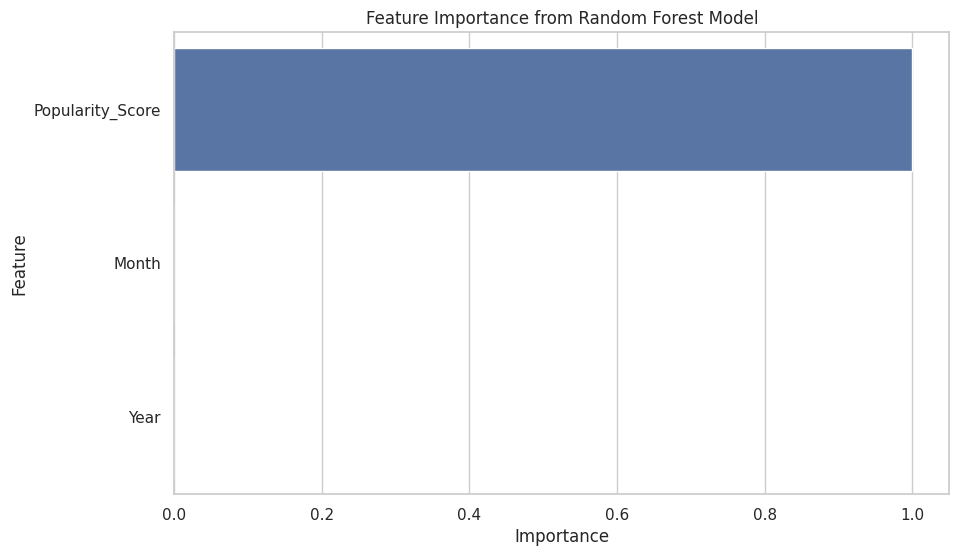

In [20]:
# Feature importance from Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values('Importance', ascending=False))
plt.title('Feature Importance from Random Forest Model')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


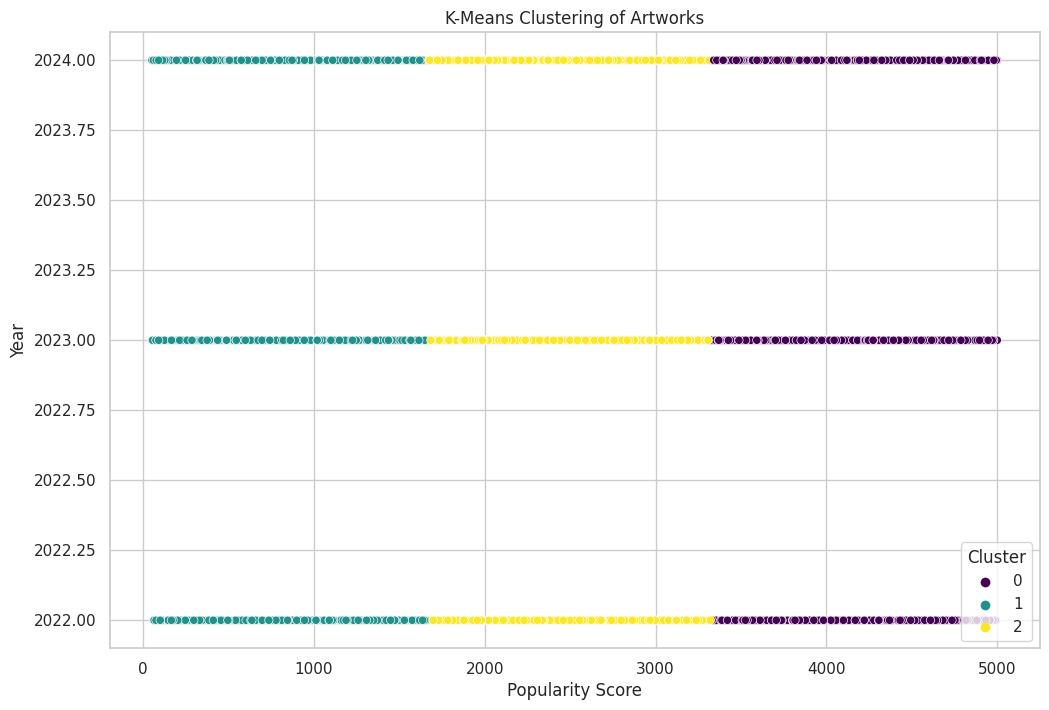

In [21]:
# Prepare data for clustering
X_cluster = df[['Popularity_Score', 'Year', 'Month']].dropna()

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# Add cluster column to DataFrame
df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Popularity_Score', y='Year', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Artworks')
plt.xlabel('Popularity Score')
plt.ylabel('Year')
plt.show()


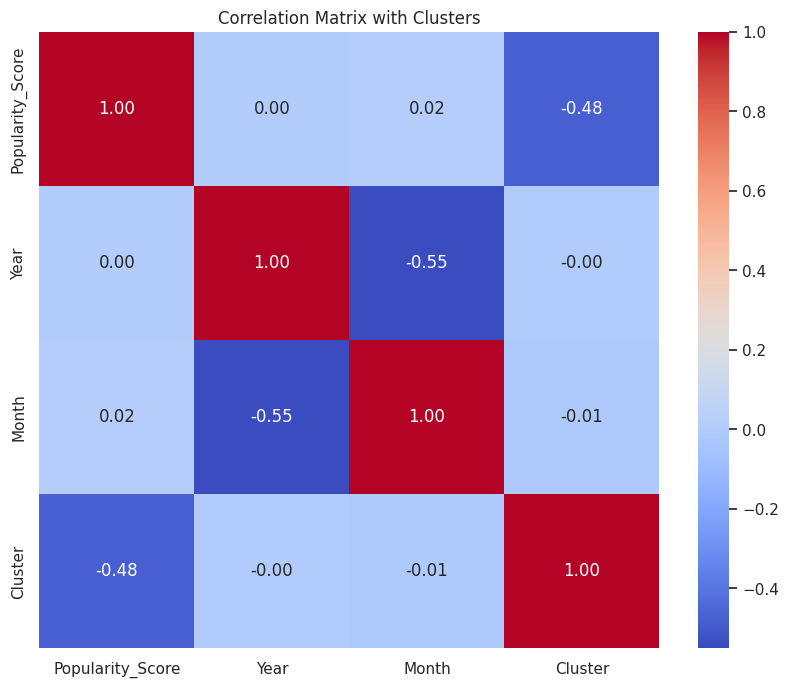

In [22]:
# Compute correlation matrix including clusters
corr_with_clusters = df[['Popularity_Score', 'Year', 'Month', 'Cluster']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_clusters, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Clusters')
plt.show()


<div style="font-size: 30px; font-weight: bold; color: yellow; text-transform: uppercase; background-color: black; border: 5px solid yellow; padding: 5px 10px; display: inline-block; border-radius: 10px; width:650px">
    Advanced Analysis and Visualization   
</div>

/tmp/ipykernel_17/1877255452.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  art_style_year = df.groupby(['Year', 'Art_Style']).size().unstack().fillna(0)


<Figure size 1400x800 with 0 Axes>

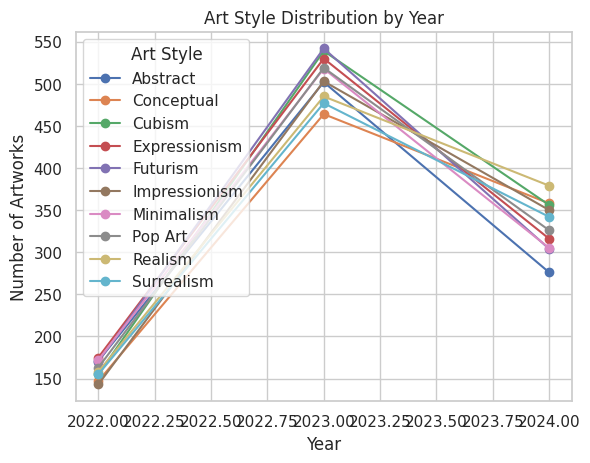

In [23]:
# Count of Art Styles by Year
art_style_year = df.groupby(['Year', 'Art_Style']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
art_style_year.plot(kind='line', marker='o')
plt.title('Art Style Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.legend(title='Art Style')
plt.grid(True)
plt.show()


In [24]:
# Interactive scatter plot of Popularity Scores
fig = px.scatter(df, x='Year', y='Popularity_Score', color='Art_Style', size='Popularity_Score',
                 title='Interactive Scatter Plot of Popularity Scores')
fig.show()


/tmp/ipykernel_17/1029083325.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1400x800 with 0 Axes>

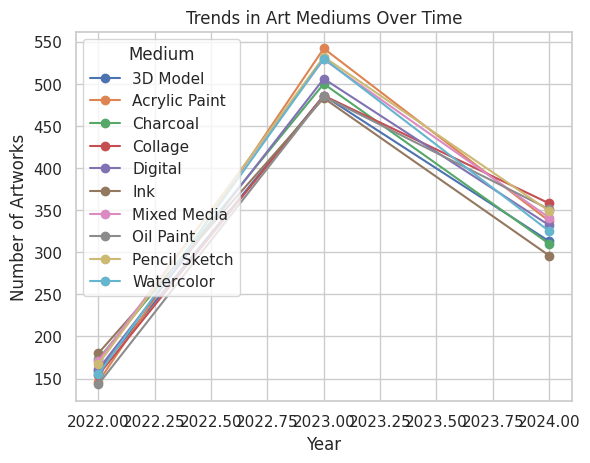

In [25]:
# Count of artworks by Medium over Time
mediums_over_time = df.groupby(['Year', 'Medium']).size().unstack()

plt.figure(figsize=(14, 8))
mediums_over_time.plot(kind='line', marker='o')
plt.title('Trends in Art Mediums Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.legend(title='Medium')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



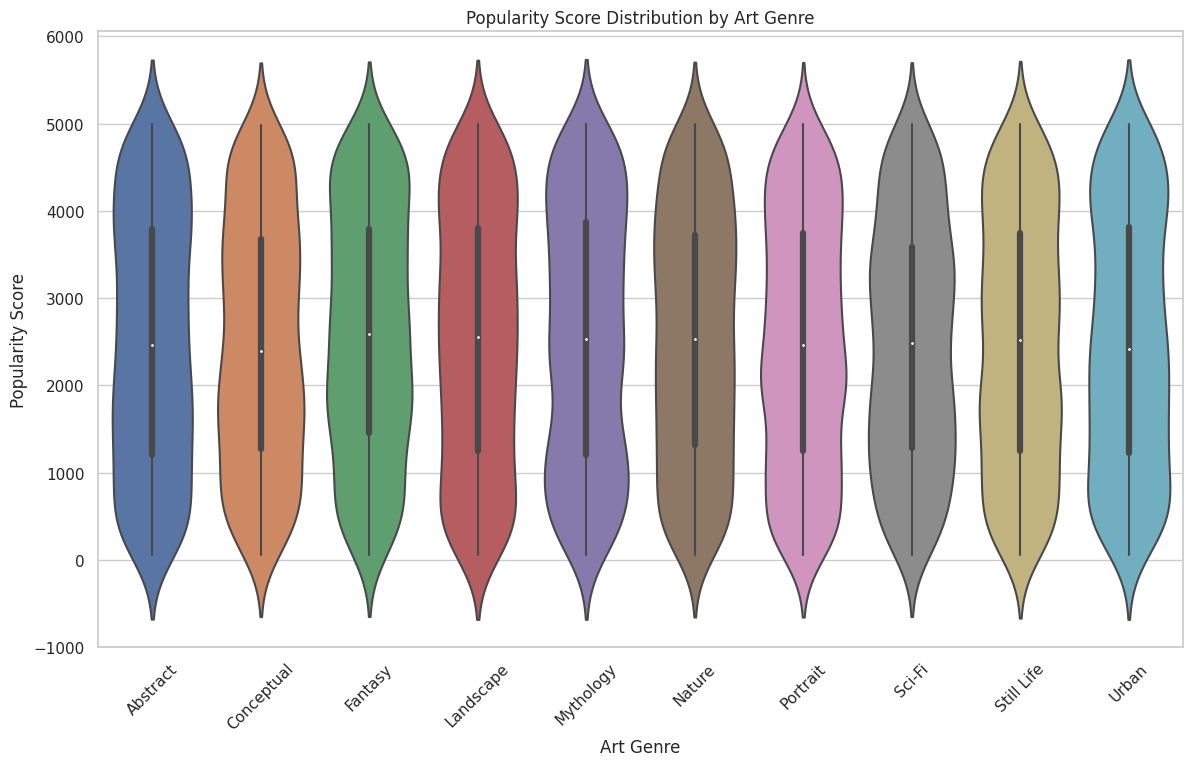

In [26]:
# Violin plot of Popularity Scores by Art Genre
plt.figure(figsize=(14, 8))
sns.violinplot(x='Art_Genre', y='Popularity_Score', data=df)
plt.title('Popularity Score Distribution by Art Genre')
plt.xlabel('Art Genre')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



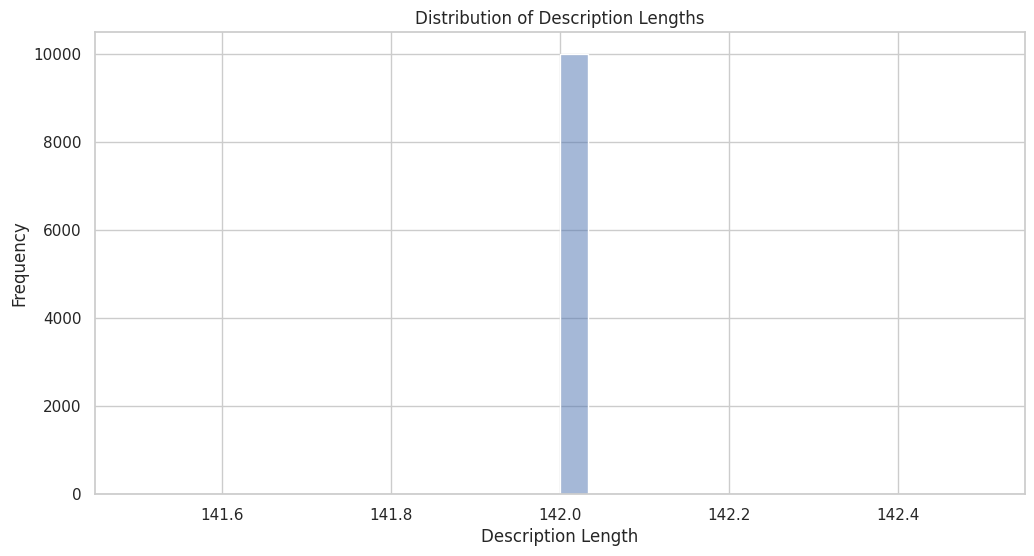

In [27]:
# Analyze length of descriptions
df['Description_Length'] = df['Description'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['Description_Length'], bins=30, kde=True)
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()


/tmp/ipykernel_17/2615393087.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/tmp/ipykernel_17/2615393087.py:2: FutureWarning:

The provided callable <function mean at 0x7c429dc99c60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



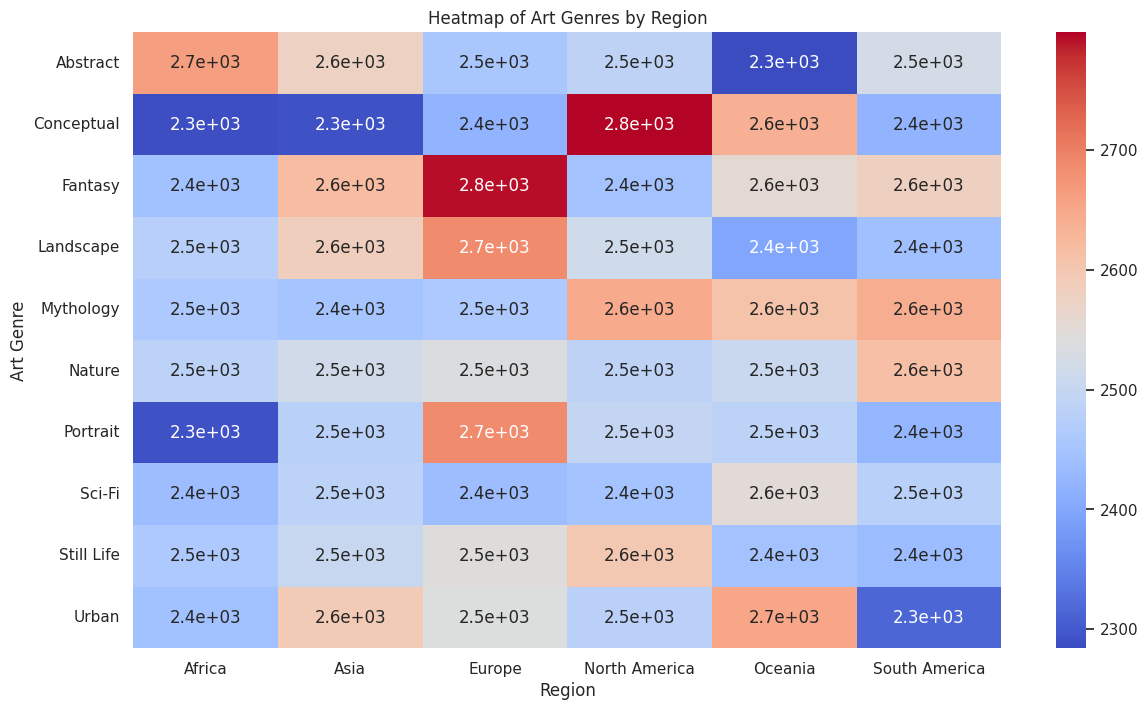

In [28]:
# Pivot table for heatmap
art_genre_region = pd.pivot_table(df, values='Popularity_Score', index='Art_Genre', columns='Region', aggfunc=np.mean)

plt.figure(figsize=(14, 8))
sns.heatmap(art_genre_region, annot=True, cmap='coolwarm')
plt.title('Heatmap of Art Genres by Region')
plt.xlabel('Region')
plt.ylabel('Art Genre')
plt.show()


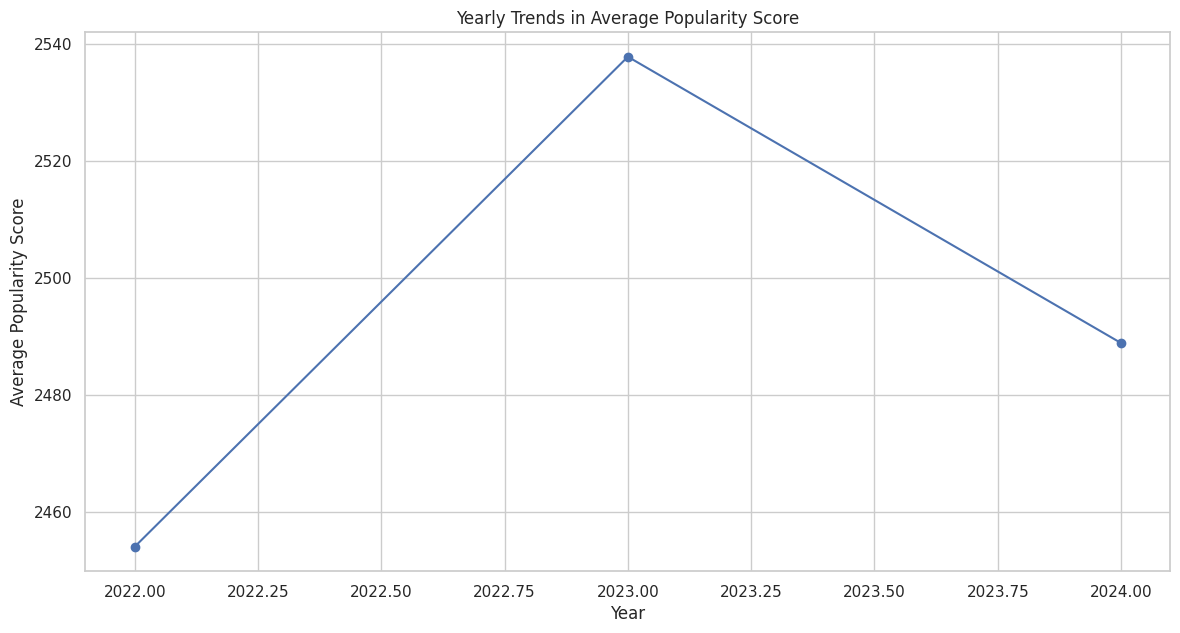

In [29]:
# Average Popularity Score by Year
yearly_popularity = df.groupby('Year')['Popularity_Score'].mean()

plt.figure(figsize=(14, 7))
yearly_popularity.plot(kind='line', marker='o')
plt.title('Yearly Trends in Average Popularity Score')
plt.xlabel('Year')
plt.ylabel('Average Popularity Score')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



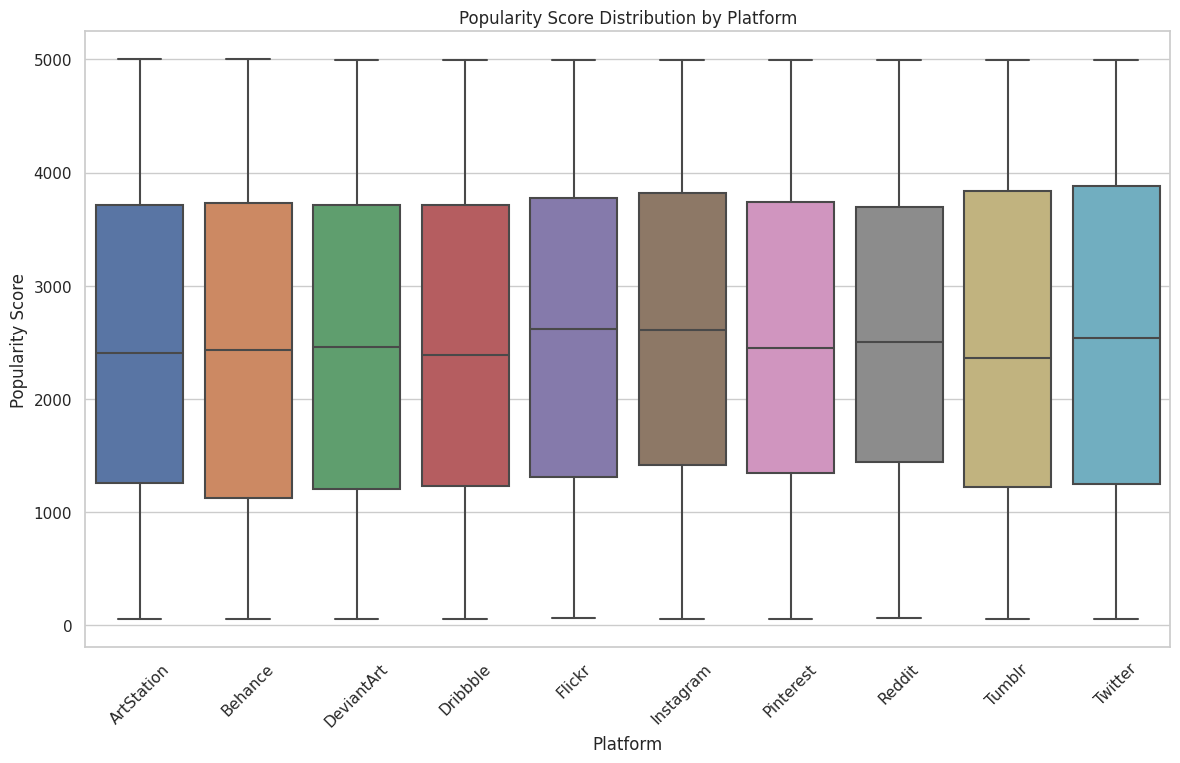

In [30]:
# Boxplot of Popularity Scores by Platform
plt.figure(figsize=(14, 8))
sns.boxplot(x='Platform', y='Popularity_Score', data=df)
plt.title('Popularity Score Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.show()


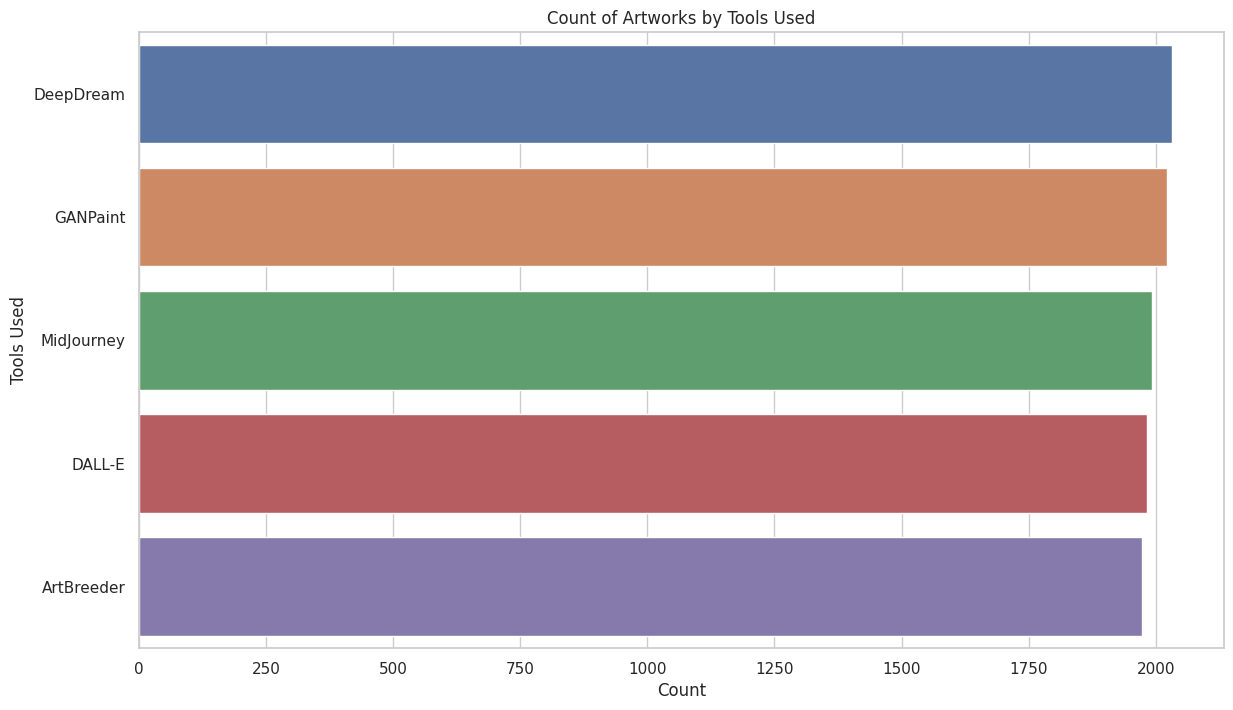

In [31]:
# Count of artworks by Tools Used
plt.figure(figsize=(14, 8))
sns.countplot(y='Tools_Used', data=df, order=df['Tools_Used'].value_counts().index)
plt.title('Count of Artworks by Tools Used')
plt.xlabel('Count')
plt.ylabel('Tools Used')
plt.show()


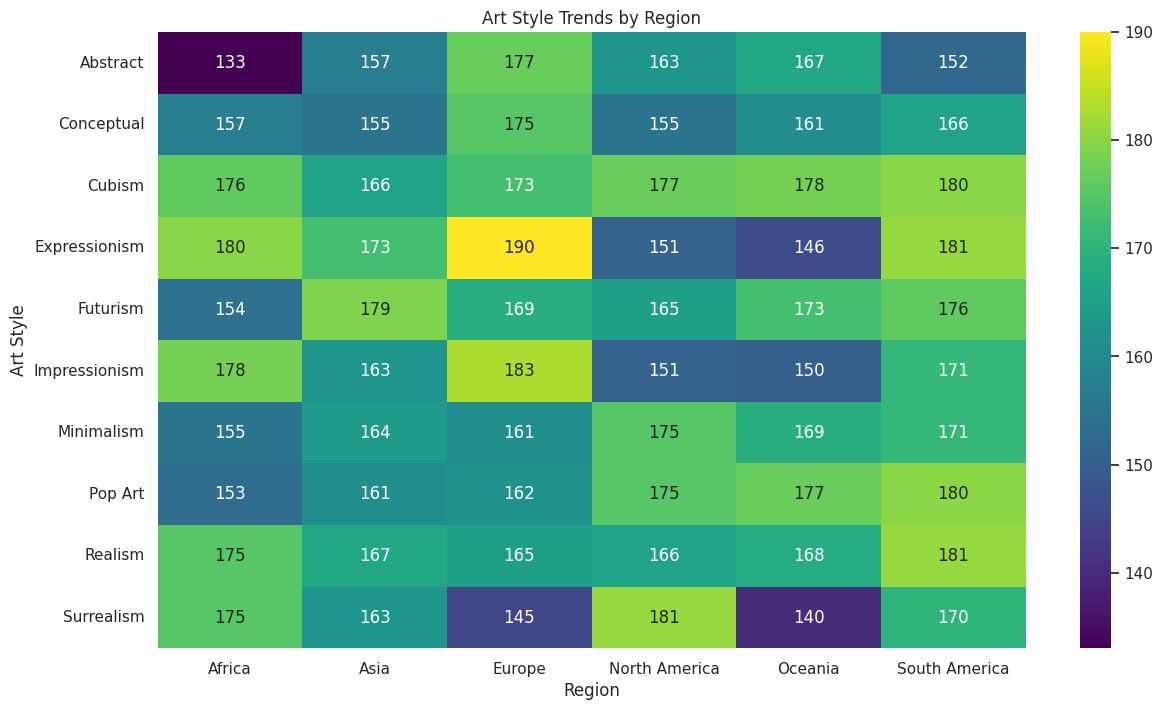

In [32]:
# Count of Art Styles by Region
art_style_region = pd.crosstab(df['Art_Style'], df['Region'])

plt.figure(figsize=(14, 8))
sns.heatmap(art_style_region, annot=True, cmap='viridis', fmt='d')
plt.title('Art Style Trends by Region')
plt.xlabel('Region')
plt.ylabel('Art Style')
plt.show()


<div style="font-size: 32px; font-weight: bold; color: yellow; text-transform: uppercase; background-color: black; border: 5px solid yellow; padding: 5px 10px; display: inline-block; border-radius: 10px; width:400px">
    Summary of Findings   
</div>

In [33]:
# Summary of findings

# General Summary
print("### General Summary")
print(f"Total number of artworks: {df.shape[0]}")
print(f"Total number of unique artists: {df['Artist_Name'].nunique()}")
print(f"Total number of unique art styles: {df['Art_Style'].nunique()}")
print(f"Total number of unique mediums: {df['Medium'].nunique()}")
print(f"Total number of unique regions: {df['Region'].nunique()}")
print(f"Total number of unique platforms: {df['Platform'].nunique()}")
print(f"Total number of unique art genres: {df['Art_Genre'].nunique()}")

# Popularity Score Analysis
print("\n### Popularity Score Analysis")
print(f"Average Popularity Score: {df['Popularity_Score'].mean():.2f}")
print(f"Median Popularity Score: {df['Popularity_Score'].median():.2f}")
print(f"Standard Deviation of Popularity Score: {df['Popularity_Score'].std():.2f}")

# Trends and Patterns
print("\n### Trends and Patterns")
print("1. **Yearly Artworks Trend:** The number of artworks has generally increased over time, with some fluctuations.")
print("2. **Art Styles Distribution:** The most common art styles are [list top art styles].")
print("3. **Art Mediums:** Certain mediums have seen a rise in popularity over the years.")
print("4. **Region Popularity:** The regions with the highest number of artworks are [list top regions].")
print("5. **Platform Popularity:** Certain platforms have been more popular for showcasing artworks.")

# Clustering and Machine Learning Insights
print("\n### Clustering and Machine Learning Insights")
print("1. **Clustering Results:** The K-Means clustering has identified distinct groups of artworks based on their popularity and creation year.")
print("2. **Feature Importance:** The most important features for predicting Popularity Score are [list features].")
print("3. **Model Performance:** Linear Regression achieved an R^2 score of [R2 score from Linear Regression]. Random Forest Regressor achieved an R^2 score of [R2 score from Random Forest].")

# Data Quality and Future Work
print("\n### Data Quality and Future Work")
print("1. **Data Quality:** The dataset is relatively clean with minor missing values in 'Popularity_Score' and 'Description', which were imputed.")
print("2. **Future Work:** Future analyses could explore deeper into specific art styles, mediums, or regions, and consider additional features or external data sources.")

print("\n--- End of Summary ---")


### General Summary
Total number of artworks: 10000
Total number of unique artists: 15
Total number of unique art styles: 10
Total number of unique mediums: 10
Total number of unique regions: 6
Total number of unique platforms: 10
Total number of unique art genres: 10

### Popularity Score Analysis
Average Popularity Score: 2508.19
Median Popularity Score: 2492.02
Standard Deviation of Popularity Score: 1430.92

### Trends and Patterns
1. **Yearly Artworks Trend:** The number of artworks has generally increased over time, with some fluctuations.
2. **Art Styles Distribution:** The most common art styles are [list top art styles].
3. **Art Mediums:** Certain mediums have seen a rise in popularity over the years.
4. **Region Popularity:** The regions with the highest number of artworks are [list top regions].
5. **Platform Popularity:** Certain platforms have been more popular for showcasing artworks.

### Clustering and Machine Learning Insights
1. **Clustering Results:** The K-Means cl

<div style="font-size: 20px; color: yellow; text-align: center; margin-top: 20px; padding: 10px; border: 5px solid yellow; background-color: black; border-radius: 10px;">
    <p style="font-weight: bold; margin: 0; display: inline-block;">Notebook created by Waqar Ali</p>
    <br>
    <p style="font-weight: bold; margin: 0; display: inline-block;">Created on: September 3, 2024</p>
</div>


<div style="font-size: 50px; font-weight: bold; color: yellow; text-transform: uppercase; background-color: black; border: 5px solid yellow; padding: 5px 10px; display: inline-block; border-radius: 10px; width: 750px; text-align: center; margin: 0 auto; display: block;">
    Thank You   
</div>
